In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
# выводим информацию о типах
print(df.dtypes)

# или более подробно
print(df.info())

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB
None


Сразу переведем столбец "Дата" в правильный формат

In [6]:
# DataFrame df
df["Дата"] = pd.to_datetime(df["Дата"], errors="coerce", dayfirst=True)

# проверим
print(df["Дата"].head())

0   2018-04-01
1   2018-04-01
2   2018-04-01
3   2018-04-01
4   2018-04-01
Name: Дата, dtype: datetime64[ns]


Сгруппируйте данные по дате, посчитайте количество продаж

In [7]:
grouped_df = df.groupby("Дата").size().reset_index(name="Количество")

print(grouped_df.head())

        Дата  Количество
0 2018-01-02        1521
1 2018-01-03        1387
2 2018-01-04        1455
3 2018-01-05        1481
4 2018-01-06        1467


Вывести несколько первых строк сгруппированных данных

In [8]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-02        1521
1 2018-01-03        1387
2 2018-01-04        1455
3 2018-01-05        1481
4 2018-01-06        1467


Нарисуйте график продаж у `grouped_df`

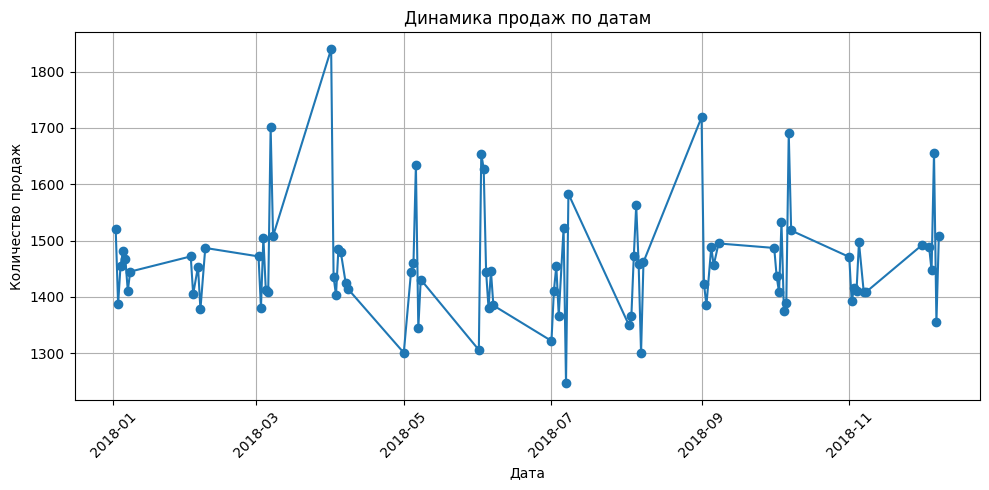

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_df["Дата"], grouped_df["Количество"], marker="o")

plt.title("Динамика продаж по датам")
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
Динамика продаж в общей совокупности отличная.
Есть большие всплески в месяцах: марта, апреля, сентября и немножко в октябре.
Низкие продажи в начале года, могут быть связаны с праздничными днями и выходными, что логично для такого показателя.
В целом средний заказ по дням почти стабильный, и по моему линому мнению, если нет внешних факторов (праздники, выходные и.т.д) то в целом стабильно

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [11]:
Q1 = df["Количество"].quantile(0.25) 
Q3 = df["Количество"].quantile(0.75)
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Количество"] < lower_bound) | (df["Количество"] > upper_bound)]

max_outlier = outliers.sort_values(by="Количество", ascending=False).head(1)

print("Максимальный выброс:")
print(max_outlier)

Максимальный выброс:
       Дата  Склад   Контрагент Номенклатура  Количество
218822  NaT      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [14]:
df_filtered = df[df["Склад"] == 3].copy()

# выделяем месяц и день недели
df_filtered["Месяц"] = df_filtered["Дата"].dt.month

# оставляем только июнь(6), июль(7), август(8) и среду
df_filtered = df_filtered[df_filtered["Месяц"].isin([6, 7, 8])]

# группируем по товару и суммируем продажи
grouped = df_filtered.groupby("Номенклатура")["Количество"].sum().reset_index()

# находим топ-1 товар
top_item = grouped.sort_values("Количество", ascending=False).head(1)

print("Топовый товар по продажам за июнь-июль-август на складе №3:")
print(top_item)

Топовый товар по продажам за июнь-июль-август на складе №3:
  Номенклатура  Количество
1    product_1        3425


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [37]:
weather = pd.read_csv("Погода астана - Погода астана.csv.csv",
                      encoding="utf-8",
                      sep=",",
                      skiprows=6)   # если лишние строки в начале

In [38]:
print(weather.columns)

Index(['Местное время в Астане', 'Дата', 'Время', 'T', 'Po', 'P', 'Pa', 'U',
       'DD', 'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl',
       'Nh', 'H', 'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')


In [43]:
weather["Дата"] = pd.to_datetime(weather["Дата"], dayfirst=True)
weather["Day"] = weather["Дата"].dt.date

daily_weather = weather.groupby("Day")["T"].mean().reset_index()
daily_weather.rename(columns={"Day": "Дата", "T": "T_avg"}, inplace=True)

In [44]:
grouped_df["Дата"] = pd.to_datetime(grouped_df["Дата"]).dt.date
daily_weather["Дата"] = pd.to_datetime(daily_weather["Дата"]).dt.date

merged = pd.merge(grouped_df, daily_weather, on="Дата", how="inner")

In [46]:
print(merged.columns)

Index(['Дата', 'Количество', 'T_avg'], dtype='object')


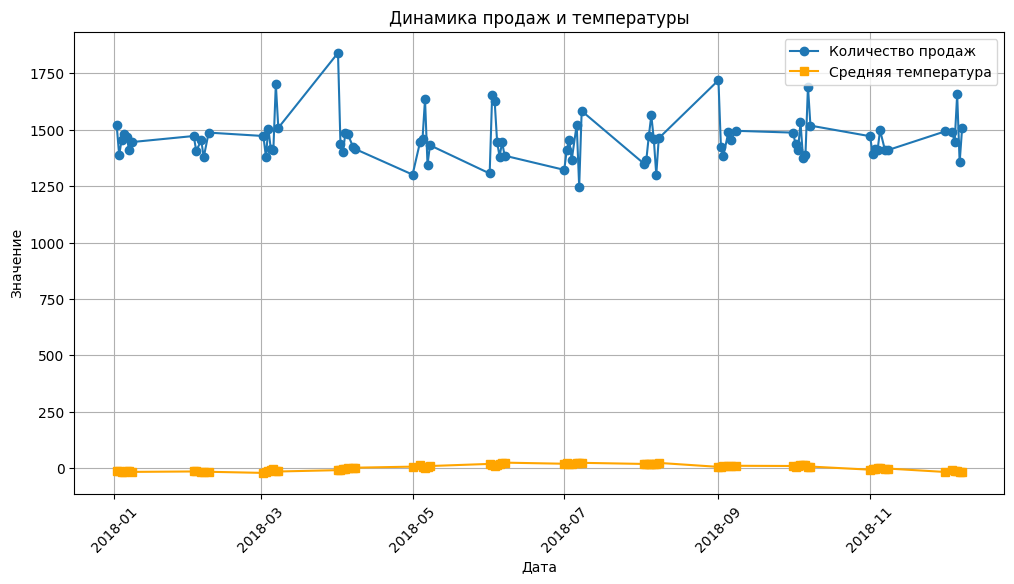

In [48]:
plt.figure(figsize=(12,6))

plt.plot(merged["Дата"], merged["Количество"], marker="o", label="Количество продаж")

plt.plot(merged["Дата"], merged["T_avg"], marker="s", label="Средняя температура", color="orange")

plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Динамика продаж и температуры")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()